## Libraries

In [2]:
import pandas as pd
import numpy as np

from scipy.linalg import svd

import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [3]:
data = pd.read_csv("framingham.csv")

## Settings

In [4]:
pd.set_option('display.max_rows', None)

## Explore the Data

In [5]:
#display(data)
#data.info()
#data.describe()

## Handle Missing Values

### Check for Missing Values

In [6]:
#data.isnull().values.any()
#sns.heatmap(data.isnull(), yticklabels=False, cbar=False).set(title = 'Missing Data');

In [7]:
print(data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


#### Samples with Missing Values

In [8]:
count_mv = sum([True for idx,row in data.iterrows() if any(row.isnull())])
print(count_mv)

582


### Drop Missing Values

#### Only one Demographic Attribute:

In [9]:
data.drop(data.loc[(data['education'].isnull() == True)].index, inplace=True)

#### It is hard to guess whether or not a person was on blood pressure medication and it seems like an important attribute, so it is better to drop those samples

In [10]:
data.drop(data.loc[(data['BPMeds'].isnull() == True)].index, inplace=True)

#### Drop the one Sample with Missing Heart Rate Value

In [11]:
data.drop(data.loc[(data['heartRate'].isnull() == True)].index, inplace=True)

#### Drop Samples with over two Missing Attributes

In [12]:
data.drop(data.loc[(data['BPMeds'].isnull() == True) & (data['totChol'].isnull() == True)].index, inplace=True)
data.drop(data.loc[(data['BPMeds'].isnull() == True) & (data['glucose'].isnull() == True)].index, inplace=True)
data.drop(data.loc[(data['totChol'].isnull() == True) & (data['BMI'].isnull() == True)].index, inplace=True)
data.drop(data.loc[(data['totChol'].isnull() == True) & (data['glucose'].isnull() == True)].index, inplace=True)
data.drop(data.loc[(data['BMI'].isnull() == True) & (data['glucose'].isnull() == True)].index, inplace=True)

#### Number of Samples Dropped

In [13]:
modified_mv = sum([True for idx,row in data.iterrows() if any(row.isnull())])
deleted_mv = count_mv - modified_mv
print(deleted_mv)

202


### Modify Missing Values

#### Check if the cigsPerDay Missing Samples are Current Smokers

In [14]:
#data.loc[data['cigsPerDay'].isnull() == True]['currentSmoker']

#### Fill the Missing Values in cigsPerDay Column with Column's Mean Value

In [15]:
cigsPerDay_mean = round(np.mean(data.loc[data['currentSmoker'] == 1]['cigsPerDay']))
data['cigsPerDay'].fillna(cigsPerDay_mean, inplace=True)

#### Fill the Missing Values in the Remaining Columns with Column's Mean Value

In [16]:
totChol_mean = np.mean(data['totChol'])
data['totChol'].fillna(totChol_mean, inplace=True)

BMI_mean = np.mean(data['BMI'])
data['BMI'].fillna(BMI_mean, inplace=True)

glucose_mean = np.mean(data['glucose'])
data['glucose'].fillna(glucose_mean, inplace=True)

#### Number of Samples Modified

In [17]:
print(modified_mv)

380


### Check for Missing Values

In [18]:
data.isnull().values.any()

False

## Summary Statistics

In [19]:
cont = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#### Mean

In [20]:
data[cont].mean()

age            49.483160
cigsPerDay      9.065131
totChol       236.606106
sysBP         132.236999
diaBP          82.855745
BMI            25.774897
heartRate      75.895740
glucose        81.929247
dtype: float64

#### Standard Deviation

In [21]:
data[cont].std()

age            8.539354
cigsPerDay    11.885819
totChol       44.025259
sysBP         21.980967
diaBP         11.896119
BMI            4.070169
heartRate     12.085599
glucose       23.054294
dtype: float64

#### Variance

In [22]:
data[cont].var()

age             72.920573
cigsPerDay     141.272695
totChol       1938.223406
sysBP          483.162916
diaBP          141.517642
BMI             16.566272
heartRate      146.061706
glucose        531.500486
dtype: float64

#### Min Values

In [23]:
data[cont].min()

age            32.00
cigsPerDay      0.00
totChol       107.00
sysBP          83.50
diaBP          48.00
BMI            15.54
heartRate      44.00
glucose        40.00
dtype: float64

#### Max Values

In [24]:
data[cont].max()

age            70.0
cigsPerDay     70.0
totChol       600.0
sysBP         295.0
diaBP         142.5
BMI            56.8
heartRate     143.0
glucose       394.0
dtype: float64

## Data Visualizations

In [25]:
plot_titles = ['Age', 'Cigarettes Per Day', 'Total Cholesterol', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Body Mass Index', 'Heart Rate', 'Glucose']
cont_attributes = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
cont_data = data[cont_attributes]
filter_cigs = cont_data[cont_data['cigsPerDay'] != 0]

### Scatter Plots

<Figure size 1440x720 with 0 Axes>

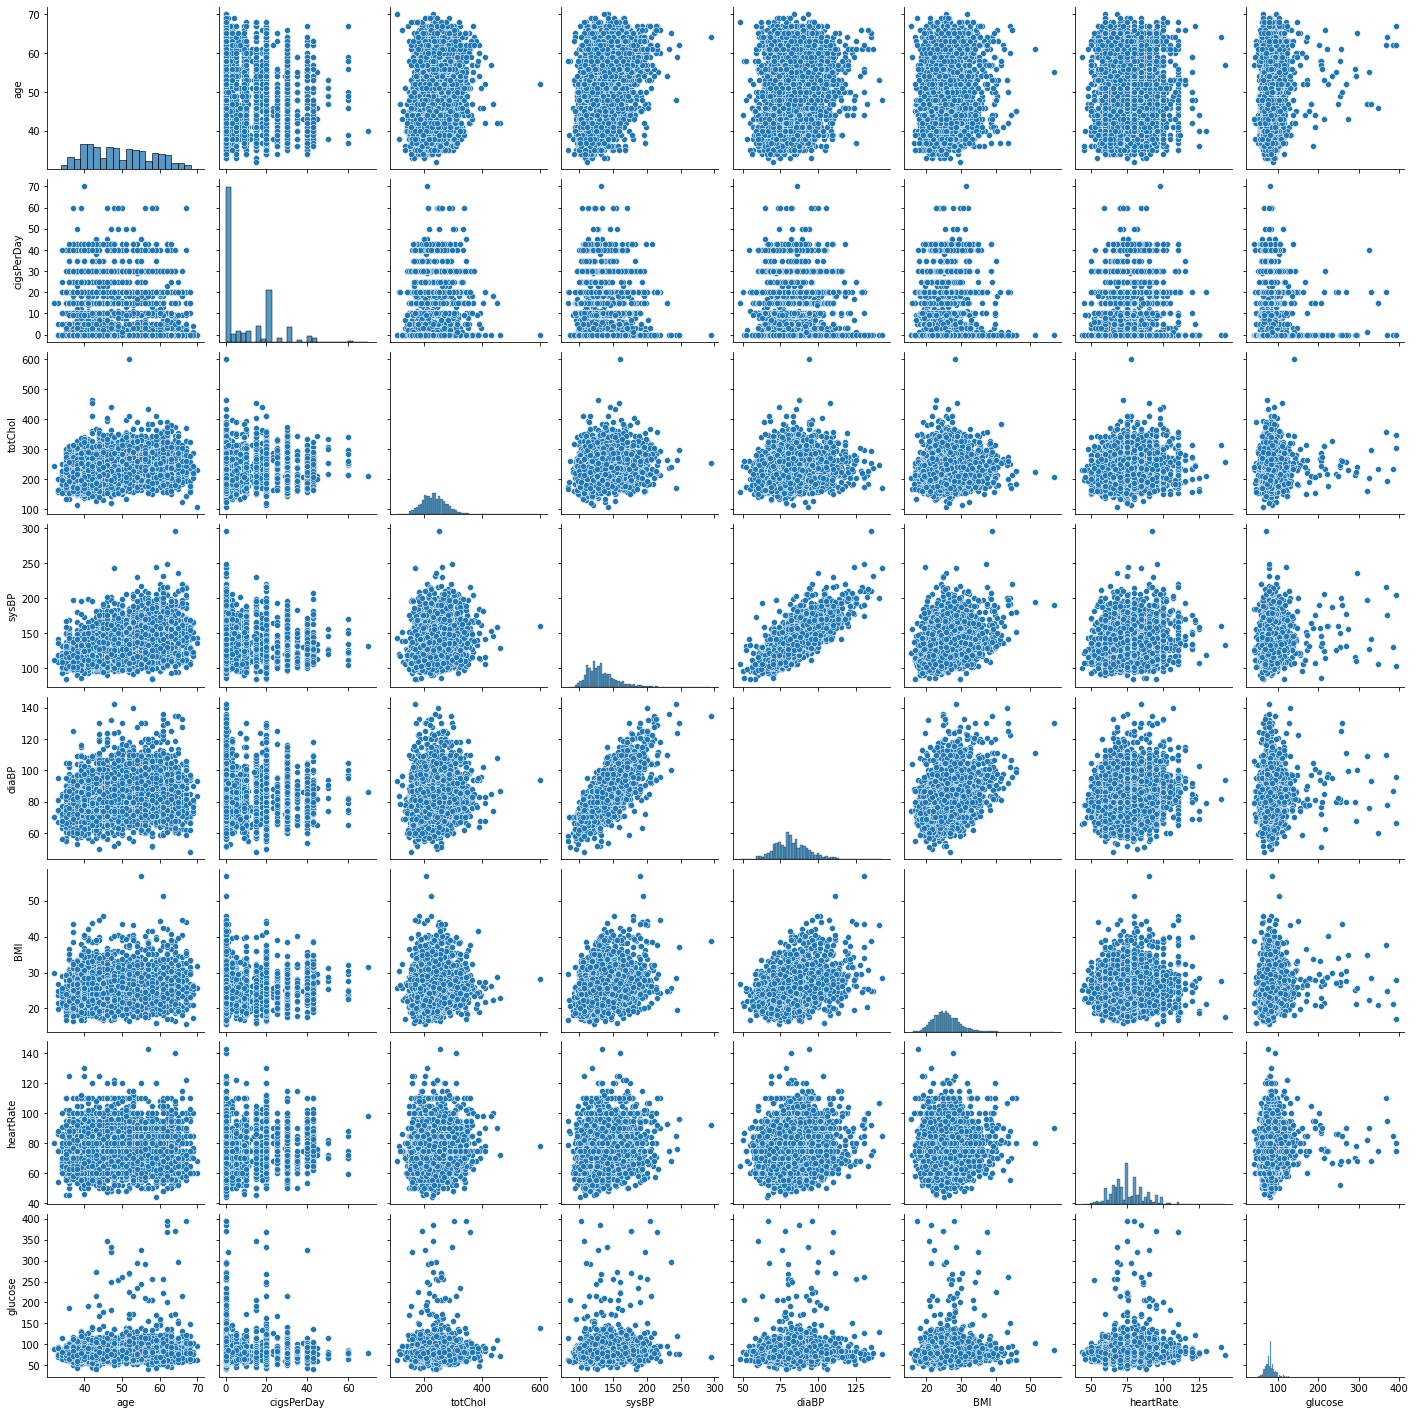

In [26]:
plt.figure(figsize = [20, 10])
sns.pairplot(cont_data)

plt.savefig('Scatter Plot.png');

### HeatMap

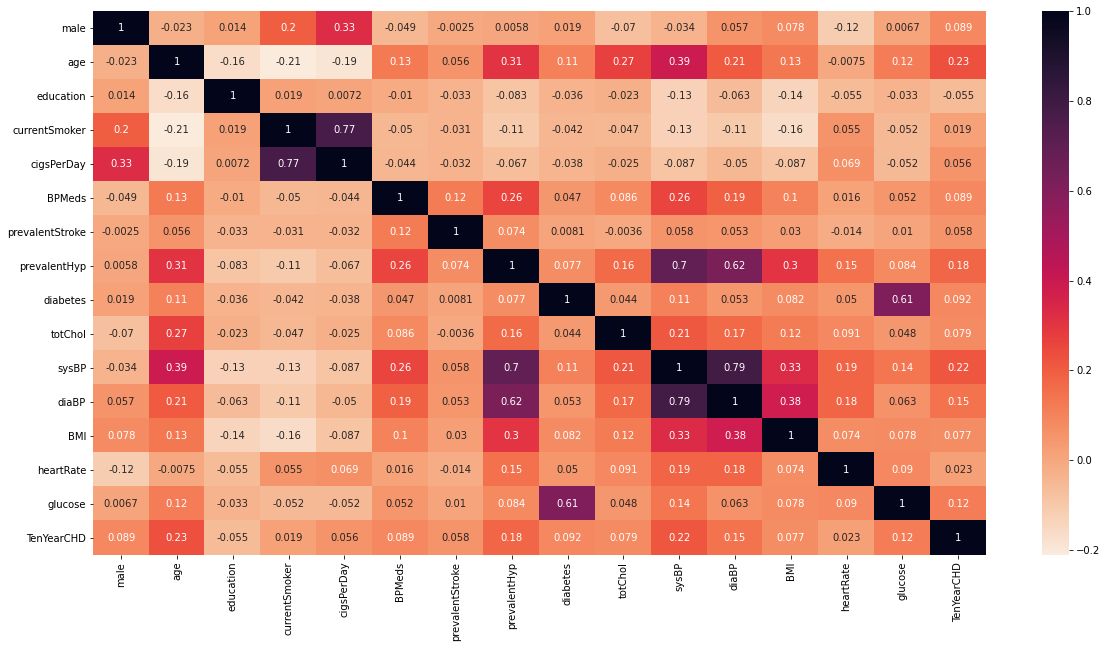

In [27]:
plt.figure(figsize = [20, 10])

sns.heatmap(data.corr(), cmap = 'rocket_r', annot = True)

plt.savefig('Heatmap.png');

### Box Plots

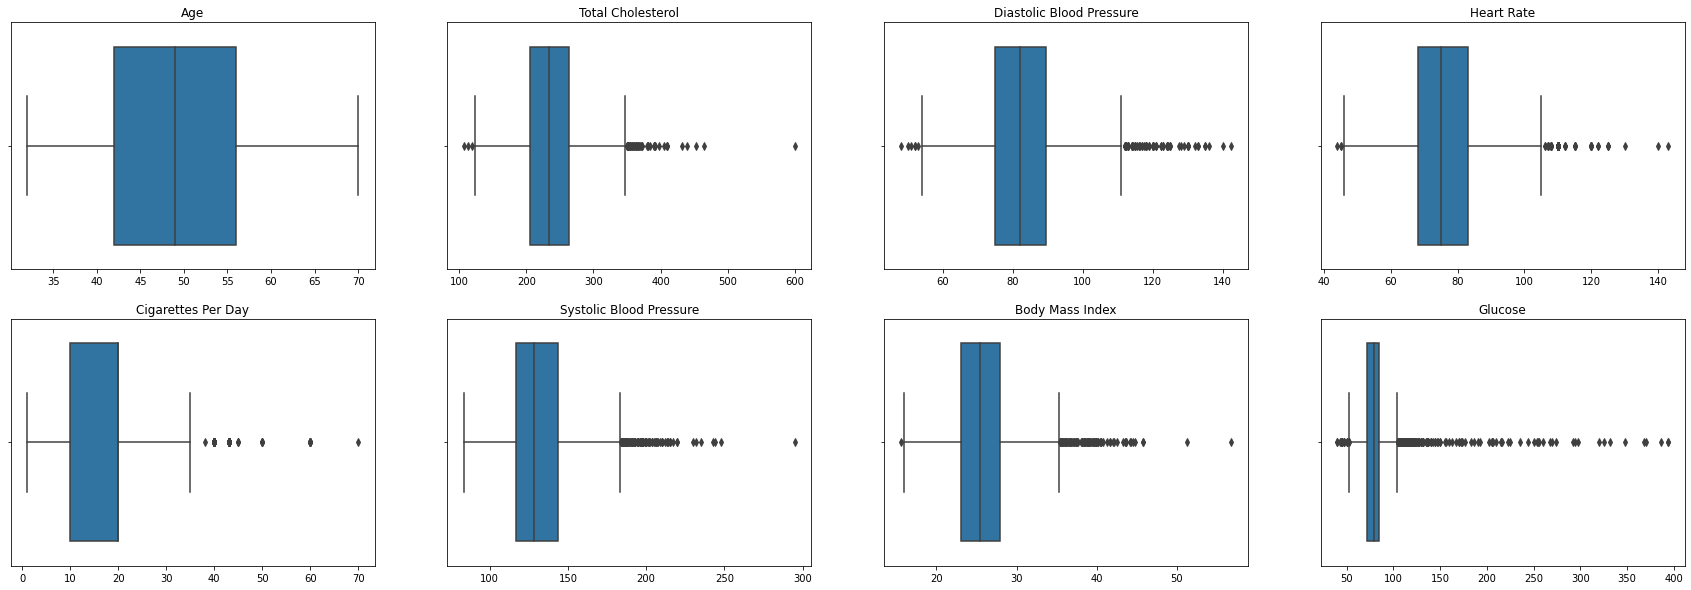

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,10), sharex=False)

for i, att in enumerate(cont_attributes):
    if att == 'cigsPerDay':
        sns.boxplot(x=filter_cigs[att], ax=axes[i%2,i//2]).set_title(plot_titles[i]);
        axes[i%2,i//2].set(xlabel=None)
    else:
        sns.boxplot(x=cont_data[att], ax=axes[i%2,i//2]).set_title(plot_titles[i]);
        axes[i%2,i//2].set(xlabel=None)
        
plt.savefig('Box Plot.png');

### Histograms

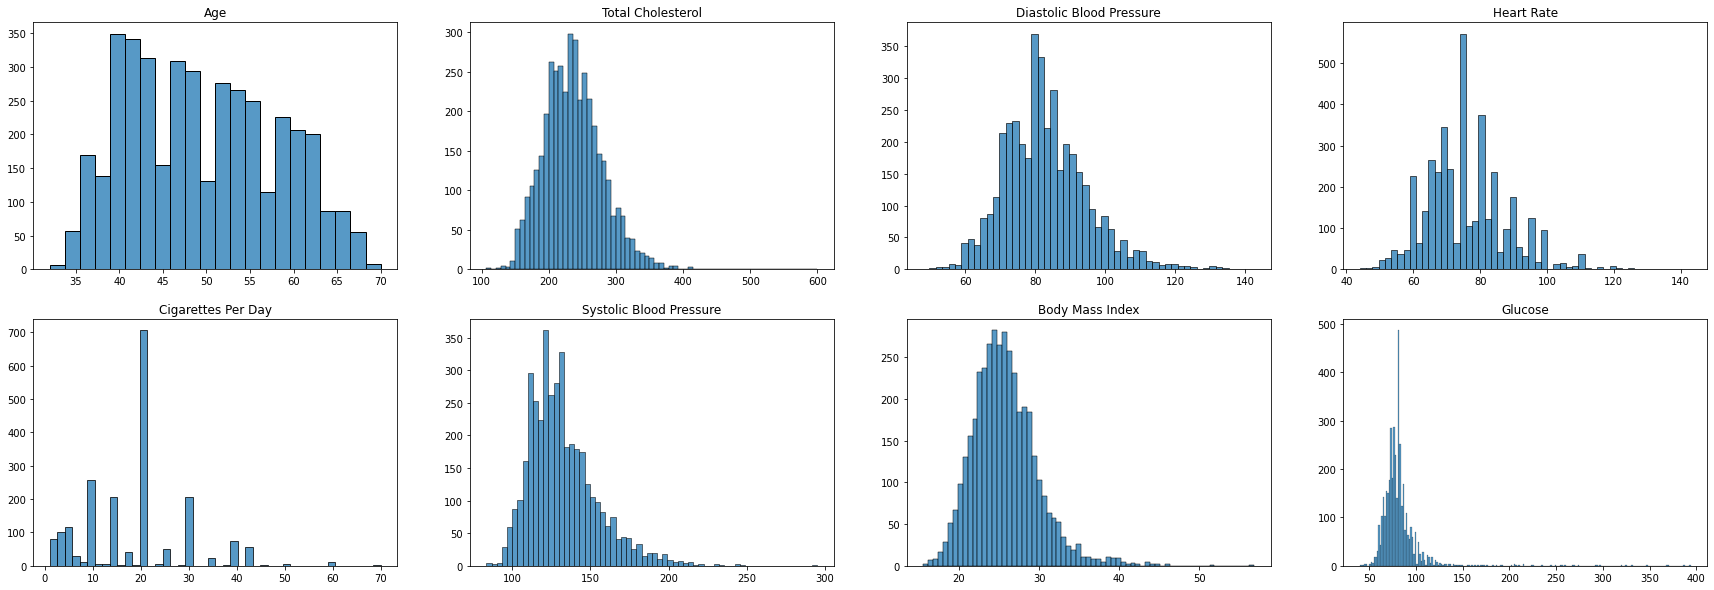

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,10), sharex=False)

for i, att in enumerate(cont_attributes):
    if att == 'cigsPerDay':
        sns.histplot(x=filter_cigs[att], ax=axes[i%2,i//2]).set_title(plot_titles[i]);
        axes[i%2,i//2].set(xlabel=None)
        axes[i%2,i//2].set(ylabel=None)
    else:
        sns.histplot(x=cont_data[att], ax=axes[i%2,i//2]).set_title(plot_titles[i]);
        axes[i%2,i//2].set(xlabel=None)
        axes[i%2,i//2].set(ylabel=None)
        
plt.savefig('Histogram.png');

## Data Preprocessing

#### Turn DataFrame to NumPy ndArray

In [ ]:
data_np = data.to_numpy()

#### Perform One-Out-of-K Encoding to the Categorical Variables (Not Binary)

In [ ]:
#Create one-out-of-K Matrix
education = np.array(data_np[:, 2], dtype=int).T
K = education.max()+1
education_encoding = np.zeros((education.size, K))
education_encoding[np.arange(education.size), education] = 1
education_encoding = education_encoding[:,1:]

#Delete Column
data_np = np.delete(arr=data_np, obj=2, axis=1)

#Replace Deleted Columns
data_np = np.concatenate( (data_np[:, :], education_encoding), axis=1) 

#### Split ndArray to X and y

In [ ]:
X = np.delete(arr=data_np, obj=14, axis=1)
y = data_np[:, 14]

#### Creating the New DataFrame

In [ ]:
cols = range(0, len(data.columns) - 1)
attributeNames = list(np.asarray(data.columns[cols]))
attributeNames.pop(2)
temp_col = ['educ1', 'educ2', 'educ3', 'educ4']
col = attributeNames + temp_col
data = pd.DataFrame(X, columns=col)

#### Number of Data Objects and Attributes

In [ ]:
N, M = X.shape

#### Number of Classes

In [ ]:
C = 2

## Principal Component Analysis (PCA)

#### Standard Deviation Plot

In [ ]:
plot_col = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X_plot = data[plot_col]
plt.figure(figsize=(10,7))

range_ = np.arange(1, X_plot.shape[1] + 1)

plt.bar(range_, np.std(X_plot, axis = 0))
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.xticks(range_, plot_col, rotation=90)
plt.title('Attribute\'s Standard Deviations')

plt.savefig('Standard Deviation.png');

plt.show()

#### Standardizations

In [ ]:
Y1 = X.copy()
Y2 = X.copy()

#Subtract Mean from the Data
Y1[:,1] = X[:,1] - np.concatenate(np.ones(shape = (N, 1))*X[:,1].mean(axis=0)).ravel()
Y1[:,3] = X[:,3] - np.concatenate(np.ones(shape = (N, 1))*X[:,3].mean(axis=0)).ravel()
Y1[:,8:14] = X[:,8:14] - np.ones(shape = (N, 1))*X[:,8:14].mean(axis=0)

#Subtract Mean from the Data and Divide by Standard Deviation
Y2[:,1] = X[:,1] - np.concatenate(np.ones(shape = (N, 1))*X[:,1].mean(axis=0)).ravel()
Y2[:,3] = X[:,3] - np.concatenate(np.ones(shape = (N, 1))*X[:,3].mean(axis=0)).ravel()
Y2[:,8:14] = X[:,8:14] - np.ones(shape = (N, 1))*X[:,8:14].mean(axis=0)
Y2[:,1] = Y2[:,1]*(1/np.std(Y2[:,1], 0))
Y2[:,3] = Y2[:,3]*(1/np.std(Y2[:,3], 0))
Y2[:,8:14] = Y2[:,8:14]*(1/np.std(Y2[:,8:14], 0))

#Store the Two in a Cell, so we can just Loop over them
Ys = [Y1, Y2]

titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9

#### Choose Two PC's to Plot the Projection

In [ ]:
i = 0
j = 2

#### Plot 

In [ ]:
pcs = [0,1,2]
legendStrs = ['PC' + str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1, M+1)

for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, col, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('NanoNose: PCA Component Coefficients')
plt.savefig('Coeff1')
plt.show()

In [ ]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.8)

nrows=3
ncols=2

for k in range(2):
    #Calculate the SVD
    U,S,V = svd(Ys[k], full_matrices=False)
    
    #For the direction of V to fit the convention in the course we transpose
    V=V.T  
    
    # For visualization purposes, we flip the directionality of the principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;

    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], 'o', alpha = 0.7)
        
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(['No risk of CHD', 'Risk of CHD'])
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], col[att])
        
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
    
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    
    plt.plot(range(1,len(rho)+1), rho, 'x-')
    plt.plot(range(1,len(rho)+1), np.cumsum(rho), 'o-')
    plt.plot([1,len(rho)], [threshold, threshold], 'k--')
    
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')
